## Decision Tree

### Regression Problem
Predict the collection (amount) made by a movie based on 17 features

In [1]:
# data wrangling libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import mean_squared_error, r2_score

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [2]:
moviedf = pd.read_csv("Dataset/Movie_regression.csv")
moviedf.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Data Preparation

In [4]:
# Missing Value Imputation
moviedf['Time_taken'].mean()

157.39149797570855

In [5]:
moviedf['Time_taken'].fillna(value=moviedf['Time_taken'].mean(),inplace=True)

In [6]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
# Dummy Variable Creation - categorical variable to numerical variable
moviedf = pd.get_dummies(moviedf,columns=['3D_available'],drop_first= True)

In [8]:
moviedf = pd.get_dummies(moviedf,columns=['Genre'],drop_first= False)

In [9]:
moviedf.sample(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
369,133.3996,91.20,0.369,37124.065,170.3,9.225,9.360,9.175,9.530,7.96,...,134.00,308.000,58,675,100000,1,0,0,0,1
49,24.3954,68.82,0.552,31119.110,135.5,6.945,7.050,6.850,6.980,7.42,...,119.76,263.104,45,507,38800,0,1,0,0,0
114,22.8462,75.02,0.453,34740.970,157.7,8.730,8.930,8.855,8.975,8.44,...,133.40,242.960,39,570,37000,0,1,0,0,0
489,23.6674,110.48,0.391,30074.770,171.8,8.960,9.235,9.030,9.260,6.98,...,196.80,301.120,29,659,14000,0,0,1,0,0
63,22.5300,65.26,0.547,37562.910,116.9,5.885,6.155,5.950,6.045,8.06,...,118.00,264.000,28,470,50000,1,1,0,0,0
405,1378.4160,91.20,0.307,31569.065,173.5,9.235,9.405,9.280,9.230,6.96,...,146.00,280.800,38,654,10000,1,0,0,0,1
122,21.8598,106.30,0.419,33113.355,166.4,8.830,9.075,8.865,9.050,8.18,...,178.20,203.280,51,608,41000,1,0,1,0,0
197,20.9332,58.04,0.596,39479.385,110.1,6.180,6.490,6.300,6.410,8.48,...,138.12,284.848,24,401,60600,1,1,0,0,0
28,35.4598,71.28,0.462,36079.725,167.9,7.715,7.825,7.655,7.895,7.80,...,119.36,302.944,35,544,36800,1,0,0,0,1
66,20.8758,61.74,0.602,32146.785,104.6,6.650,6.780,6.580,6.770,8.78,...,179.76,223.104,44,479,38800,0,1,0,0,0


In [10]:
moviedf.shape

(506, 21)

In [11]:
# Data Split - independent variables and dependent variable
x = moviedf.loc[:,moviedf.columns!="Collection"]
type(x)

pandas.core.frame.DataFrame

In [12]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,0,1,0


In [13]:
x.shape

(506, 20)

In [14]:
y= moviedf["Collection"]
type(y)

pandas.core.series.Series

In [15]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [16]:
y.shape

(506,)

In [17]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 20)
(102, 20)
(404,)
(102,)


#### Training ML Model (Regression Tree)

In [19]:
# Decision Tree Model
regtree = tree.DecisionTreeRegressor(max_depth=5,max_leaf_nodes=3,min_samples_split=3)

In [20]:
regtree.fit(X_train,y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
# Prediction test using test data on trained model
y_train_pred = regtree.predict(X_train) 
y_test_pred =  regtree.predict(X_test)

In [22]:
y_test_pred

array([46798.86363636, 46798.86363636, 46798.86363636, 30351.63398693,
       46798.86363636, 46798.86363636, 46798.86363636, 46798.86363636,
       46798.86363636, 46798.86363636, 30351.63398693, 30351.63398693,
       30351.63398693, 30351.63398693, 71624.        , 71624.        ,
       46798.86363636, 71624.        , 46798.86363636, 46798.86363636,
       46798.86363636, 46798.86363636, 46798.86363636, 46798.86363636,
       46798.86363636, 46798.86363636, 46798.86363636, 30351.63398693,
       71624.        , 30351.63398693, 30351.63398693, 30351.63398693,
       46798.86363636, 46798.86363636, 46798.86363636, 30351.63398693,
       30351.63398693, 46798.86363636, 30351.63398693, 30351.63398693,
       46798.86363636, 46798.86363636, 46798.86363636, 30351.63398693,
       46798.86363636, 46798.86363636, 30351.63398693, 30351.63398693,
       30351.63398693, 46798.86363636, 30351.63398693, 30351.63398693,
       46798.86363636, 71624.        , 30351.63398693, 30351.63398693,
      

#### Evaluate Model Performance

In [57]:
# deviation between predicted and actual value - squared error
# use MSE to compare different model results on same dataset

In [23]:
mean_squared_error(y_test, y_test_pred)

156998377.90930253

In [24]:
# to measure the goodness of our model
# 1= perfect fit, 0 = no fit, generally r2 = 0.4 to 0.8 for good models
# > 0.8 excellent model
r2_score(y_train,y_train_pred)

0.6297002531130993

In [25]:
r2_score(y_test,y_test_pred)

0.5123132500690313

#### Plotting Decision Tree

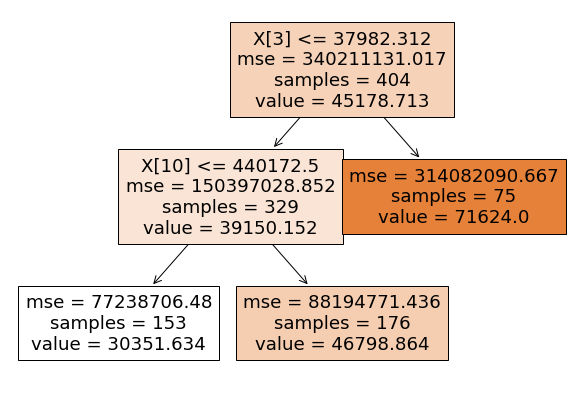

In [42]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(regtree, 
                   filled=True)